In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing

In [2]:
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

In [3]:
print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [4]:
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)

train_X -= x_mean
train_X /= x_std

test_X -= x_mean
test_X /= x_std

In [5]:
y_mean= train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)

train_Y -= y_mean
train_Y /= y_mean

test_Y -= y_mean
test_Y /= y_mean

In [6]:
print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.32127857111278124


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [8]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.07),
    loss = 'mse'
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [9]:
his = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 0s 12ms/step - loss: 4.0258 - val_loss: 0.1308
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1040 - val_loss: 0.1425
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0887 - val_loss: 0.1046
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0713 - val_loss: 0.1477
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1090 - val_loss: 0.1597
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0885 - val_loss: 0.0951
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0660 - val_loss: 0.0733
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0512 - val_loss: 0.0518
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0334 - val_loss: 0.0557
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.0444
Epoch 11/25
10/10 

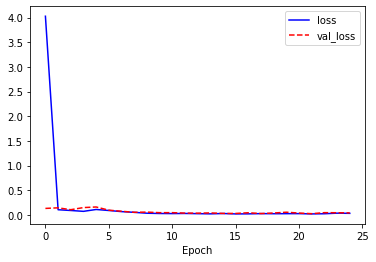

In [10]:
plt.plot(his.history['loss'], 'b-', label='loss')
plt.plot(his.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [11]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.0448


0.04477459192276001

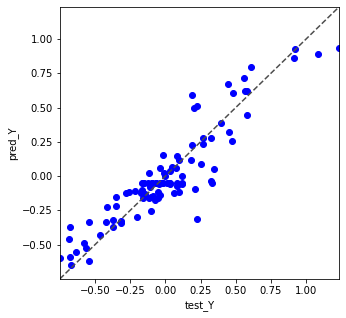

In [12]:
pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'bo')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls='--', c='.3')
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

In [44]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(lr=0.07),
    loss = 'mse'
)

In [45]:
his = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25,
                callbacks=[tf.keras.callbacks.EarlyStopping(patience=3,
                                                            monitor='val_loss')]
               )

Epoch 1/25
10/10 [==============================] - 0s 7ms/step - loss: 2.9113 - val_loss: 0.1484
Epoch 2/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1145 - val_loss: 0.1733
Epoch 3/25
10/10 [==============================] - 0s 3ms/step - loss: 0.1138 - val_loss: 0.1560
Epoch 4/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0952 - val_loss: 0.1444
Epoch 5/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0858 - val_loss: 0.1319
Epoch 6/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0844 - val_loss: 0.1261
Epoch 7/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0776 - val_loss: 0.1150
Epoch 8/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0649 - val_loss: 0.1030
Epoch 9/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0627 - val_loss: 0.0914
Epoch 10/25
10/10 [==============================] - 0s 3ms/step - loss: 0.0500 - val_loss: 0.0818
Epoch 11/25
10/10 [

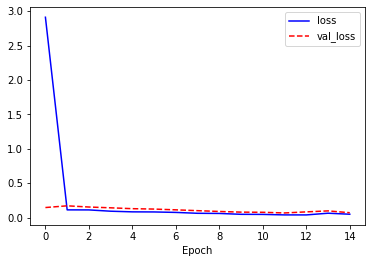

In [46]:
plt.plot(his.history['loss'], 'b-', label='loss')
plt.plot(his.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [47]:
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 1ms/step - loss: 0.0459


0.045881401747465134

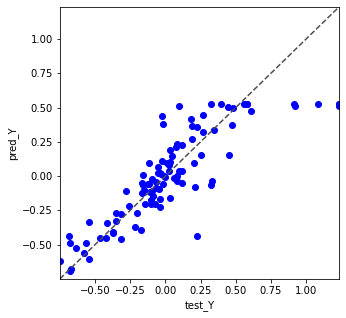

In [49]:
pred_Y = model.predict(test_X)
plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'bo')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls='--', c='.3')
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()